# Car pricing 
In this course, we explored the fundamentals of machine learning using the k-nearest neighbors algorithm. In this guided project, we'll practice the machine learning workflow we've learned so far to predict a car's market price using its attributes. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more.

In [1]:
import pandas as pd

In [2]:
#we need to manually create the columns since they are not the first line of the datafile like usual
cols = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 
        'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 
        'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_rate', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

In [3]:
cars

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


# first impressions
it's clear that the price is the target column. In order to use knn we need meaningful numerical data. A quick glance at the columns reveals the most likely candidates are 
- peak-rpm
- city-mpg
- highway-mpg
- horsepower
- compression-ratio
- engine-size
- num-of-cylinders
- normalized-losses
- curb-weight
- width
- height
- length

As we learned in this course, we usually can't have any missing values if we want to use them for predictive modeling. Based on the data set preview from the last step, we can tell that the normalized-losses column contains missing values represented using "?". Let's replace these values and look for the presence of missing values in other numeric columns. Let's also rescale the values in the numeric columns so they all range from 0 to 1.

In [4]:
import numpy as np
#replace '?'  with NAN 
cars.replace(to_replace="?", value=np.nan,inplace=True)


In [5]:
cars.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_rate     float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [6]:
cars_numeric = cars[['normalized_losses','wheel_base','length','width',
               'height','curb_weight','engine_size','bore','stroke', 'compression_rate', 'horsepower',
                    'peak_rpm', 'city_mpg', 'highway_mpg','price']]
cars_numeric = cars_numeric.astype('float')

In [7]:
cars['num_of_cylinders']

0       four
1       four
2        six
3       four
4       five
5       five
6       five
7       five
8       five
9       five
10      four
11      four
12       six
13       six
14       six
15       six
16       six
17       six
18     three
19      four
20      four
21      four
22      four
23      four
24      four
25      four
26      four
27      four
28      four
29      four
       ...  
175     four
176     four
177     four
178      six
179      six
180      six
181      six
182     four
183     four
184     four
185     four
186     four
187     four
188     four
189     four
190     four
191     five
192     four
193     four
194     four
195     four
196     four
197     four
198     four
199     four
200     four
201     four
202      six
203      six
204     four
Name: num_of_cylinders, Length: 205, dtype: object

In [8]:
#how many null values do we have
cars_numeric.isnull().sum()

normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_rate      0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

41/205 rows have missing values for normalized losses so we should think about wether we can replace these values or if we need to remove the entire row

In [9]:
#since the price is what we are trying to predict and there is only 4 missing values
# we can remove those rows
cars_numeric = cars_numeric.dropna(subset=['price'])

In [10]:
#for the other columns we'll fill NAN values with the column means
means = cars_numeric.mean()
cars_numeric = cars_numeric.fillna(value=means)

In [11]:
cars_numeric.isnull().sum()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_rate     0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [12]:
#check the means have been used
cars_numeric['normalized_losses'].value_counts()

122.0    41
161.0    11
91.0      8
150.0     7
104.0     6
134.0     6
128.0     6
94.0      5
74.0      5
85.0      5
103.0     5
168.0     5
95.0      5
65.0      5
102.0     5
148.0     4
106.0     4
93.0      4
118.0     4
115.0     3
154.0     3
125.0     3
137.0     3
101.0     3
83.0      3
194.0     2
110.0     2
145.0     2
119.0     2
197.0     2
108.0     2
188.0     2
129.0     2
81.0      2
164.0     2
192.0     2
158.0     2
153.0     2
87.0      2
89.0      2
113.0     2
121.0     1
98.0      1
186.0     1
78.0      1
107.0     1
77.0      1
90.0      1
256.0     1
231.0     1
142.0     1
Name: normalized_losses, dtype: int64

In [13]:
total_diff = cars_numeric.max()-cars_numeric.min()

In [14]:
normalised_numeric = (cars_numeric - cars_numeric.min())/total_diff


In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
#knn algo
def knn_train_test(train_col, target_col, df):
    
    
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    shuffled = np.random.permutation(df.index)
    
    random_df = df.reindex(shuffled)
    #take 50 percent as train and 50 percent as test data
    train_limit = round(len(random_df)/2)
    train_data = random_df.iloc[:train_limit,:]
    test_data = random_df.iloc[train_limit:,:]
    #k is default 5
    knn = KNeighborsRegressor()
    
    
    knn.fit(train_data[[train_col]], train_data[target_col])    
    predictions = knn.predict(test_data[[train_col]])
    mse = mean_squared_error(predictions, test_data[target_col])
    rmse = np.sqrt(mse)
    return rmse
    
   

In [16]:
#univariate knn columns, lets see which one gives the best result
training_columns = list(normalised_numeric.columns)
print(training_columns)
print(type(training_columns))
training_columns.remove('price')
print(training_columns)

['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_rate', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
<class 'list'>
['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_rate', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg']


In [17]:
#using the default k=5, which column gives the best prediction
for numeric_col in training_columns:
    rmse = knn_train_test(numeric_col, 'price', cars_numeric)
    print(numeric_col + " rmse: " + str(rmse))

normalized_losses rmse: 7339.675755133537
wheel_base rmse: 5460.851458362242
length rmse: 5428.810101415201
width rmse: 4772.459149439554
height rmse: 8073.1197593196175
curb_weight rmse: 4445.141920375235
engine_size rmse: 3271.449938331611
bore rmse: 6795.388311535586
stroke rmse: 7954.3010342434445
compression_rate rmse: 6610.812153159129
horsepower rmse: 4048.4377247389034
peak_rpm rmse: 7649.170564081823
city_mpg rmse: 4760.44984187731
highway_mpg rmse: 4643.046277675214


# Which column performs best
Engine size gives the best predictor 

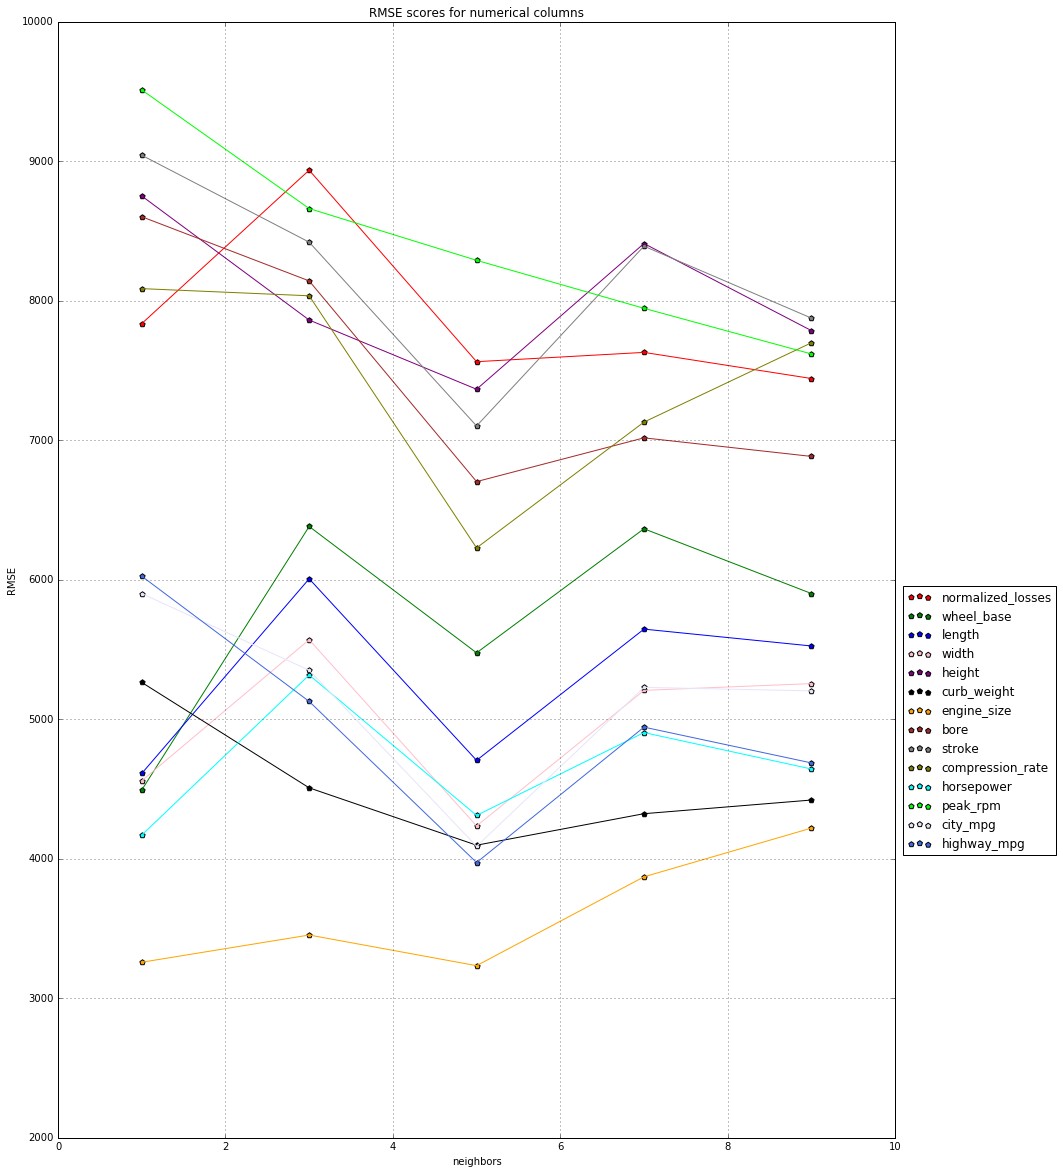

engine_size          3607.368523
curb_weight          4522.989480
horsepower           4669.468233
highway_mpg          4951.636389
width                4965.732927
city_mpg             5155.040979
length               5299.416447
wheel_base           5724.006598
compression_rate     7436.271365
bore                 7470.253429
normalized_losses    7881.975652
height               8035.296526
stroke               8166.881400
peak_rpm             8405.619550
dtype: float64

In [18]:
#knn with ability to choose k
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
def mod_knn_train_test(train_col, target_col, df, col):
        
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    k_values=[1,3,5,7,9]
    rmses = []
    
    for k in k_values:
        shuffled = np.random.permutation(df.index)
        random_df = df.reindex(shuffled)
        #take 50 percent as train and 50 percent as test data
        train_limit = round(len(random_df)/2)
        train_data = random_df.iloc[:train_limit,:]
        test_data = random_df.iloc[train_limit:,:]
        #k is default 5
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_data[[train_col]], train_data[target_col])    
        predictions = knn.predict(test_data[[train_col]])
        mse = mean_squared_error(predictions, test_data[target_col])
        rmse = np.sqrt(mse)
        rmses.append(rmse)
        
    
    ax1.scatter(k_values,rmses, c=col, alpha=1, marker=(5, 0), s=30,linestyle='-',label=train_col)
    ax1.plot(k_values,rmses,c=col)
    return rmses


fig1, ax1 = plt.subplots(figsize=(15,20),sharey=True)




ax1.axes.get_yaxis().set_visible(True)
ax1.grid(True)
ax1.set_xlabel('neighbors')
ax1.set_ylabel('RMSE')
    
rmse_means =[]
colors = ['red','green','blue','pink','purple','black','orange',
         'brown', 'gray','olive','cyan','lime','lavender','royalblue']
for numeric_col,color in zip(training_columns,colors):
    rmse = mod_knn_train_test(numeric_col, 'price', cars_numeric,color)
    rmse_means.append(np.mean(rmse))

rmse_means = pd.Series(index=training_columns, data=rmse_means)
rmse_means.sort_values()
plt.legend(bbox_to_anchor=(1.2,0.5))
plt.title('RMSE scores for numerical columns')
plt.show()
rmse_means.sort_values()
    

The most accurate column we can train on is 'engine_size'. For all values of K it performs the best of all columns and has peak performance when K is chosen to be 1 or 5. There  appears to be some slight positive correlation between K and RMSE for 'engine_size' in comparison to negative/non-existent correlation between the two for other columns.  

# Training on multiple columns

Previously we trained using single columns. This meant we could use the non normalised numerical values. Next we shall use mutliple columns to train on and to prevent certain columns having too much influence on the rmse, we can use the normalised set. If the scale of features is very different then normalization is required

[0.07920188043676839, 0.09462637360649287, 0.07785048803497963, 0.10236540267281644, 0.10600206258408053]
[0.07774684062254263, 0.10767037601980273, 0.08722163106010501, 0.10789131144444987, 0.10859081859246103]
[0.07268308714421098, 0.11067556549150988, 0.0795785982293031, 0.1065925036671091, 0.10937998312361827]
[0.07012328393149014, 0.09733469871272847, 0.0722313384350909, 0.1013195660658282, 0.10991376820413143]


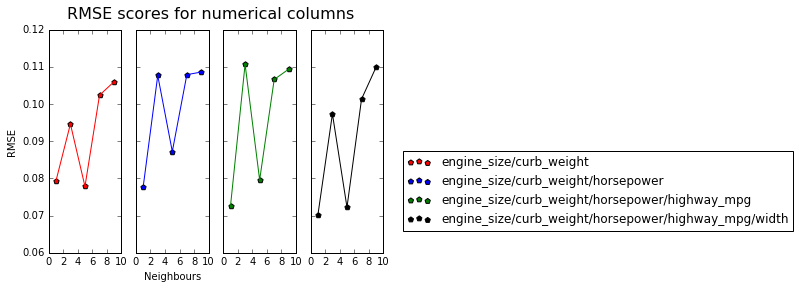

In [41]:
#knn with ability to choose k
def knn_train_test_multi(train_cols, target_col, df, col):
        
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    
    rmses = []
    
    for k in k_values:
        shuffled = np.random.permutation(df.index)
        random_df = df.reindex(shuffled)
        #take 50 percent as train and 50 percent as test data
        train_limit = round(len(random_df)/2)
        train_data = random_df.iloc[:train_limit,:]
        test_data = random_df.iloc[train_limit:,:]
        #k is default 5
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_data[train_cols], train_data[target_col])    
        predictions = knn.predict(test_data[train_cols])
        mse = mean_squared_error(predictions, test_data[target_col])
        rmse = np.sqrt(mse)
        rmses.append(rmse)
          
    return rmses


k_values=[1,3,5,7,9]

fig, axes = plt.subplots(nrows=1, ncols=4,sharey=True) 
axes = axes.flatten()

#plot1 using two best (lowest rmse) columns from previous result
rmses_best_two = knn_train_test_multi(['engine_size','curb_weight'],'price',normalised_numeric,'red')
two_best = 'engine_size/curb_weight'
print(rmses_best_two)
axes[0].scatter(k_values,rmses_best_two, c='red', alpha=1, marker=(5, 0), s=30,linestyle='-',label=two_best)
axes[0].plot(k_values,rmses_best_two,c='red')

#plot2 using best three columns
rmses_best_three = knn_train_test_multi(['engine_size','curb_weight', 'horsepower'],'price',normalised_numeric,'blue')
three_best = 'engine_size/curb_weight/horsepower'
print(rmses_best_three)
axes[1].scatter(k_values,rmses_best_three, c='blue', alpha=1, marker=(5, 0), s=30,linestyle='-',label=three_best)
axes[1].plot(k_values,rmses_best_three,c='blue')

#plot3 using best four columns
rmses_best_four = knn_train_test_multi(['engine_size','curb_weight','horsepower','highway_mpg'],'price',normalised_numeric,'green')
four_best = 'engine_size/curb_weight/horsepower/highway_mpg'
print(rmses_best_four)
axes[2].scatter(k_values,rmses_best_four, c='green', alpha=1, marker=(5, 0), s=30,linestyle='-',label=four_best)
axes[2].plot(k_values,rmses_best_four,c='green')

rmses_best_five = knn_train_test_multi(['engine_size','curb_weight', 'horsepower', 'highway_mpg', 'width'],'price',normalised_numeric,'black')
five_best = 'engine_size/curb_weight/horsepower/highway_mpg/width'
print(rmses_best_five)
axes[3].scatter(k_values,rmses_best_five, c='black', alpha=1, marker=(5, 0), s=30,linestyle='-',label=five_best)
axes[3].plot(k_values,rmses_best_five,c='black')


ax1.set_xlabel('Time')
ax1.axes.get_yaxis().set_visible(True)
ax1.grid(True)
ax1.set_xlabel('neighbors')
ax1.set_ylabel('RMSE')

lines = []
labels = []
for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)

    
fig.legend(lines, labels,           
           loc = 'upper right',bbox_to_anchor=(1.85,0.5))
fig.suptitle('RMSE scores for numerical columns', fontsize=16)
axes[0].set_ylabel('RMSE')
axes[1].set_xlabel('Neighbours')
plt.show()
    

The best combination we found was when we used all 5 of the best columns to train on. There doesnt seem to be much difference however overall. One thing worth noting is that the addition of 'horsepower' to the training columns seemed to at first (with k =1) bring the RMSE down.

# hyperparameter tuning


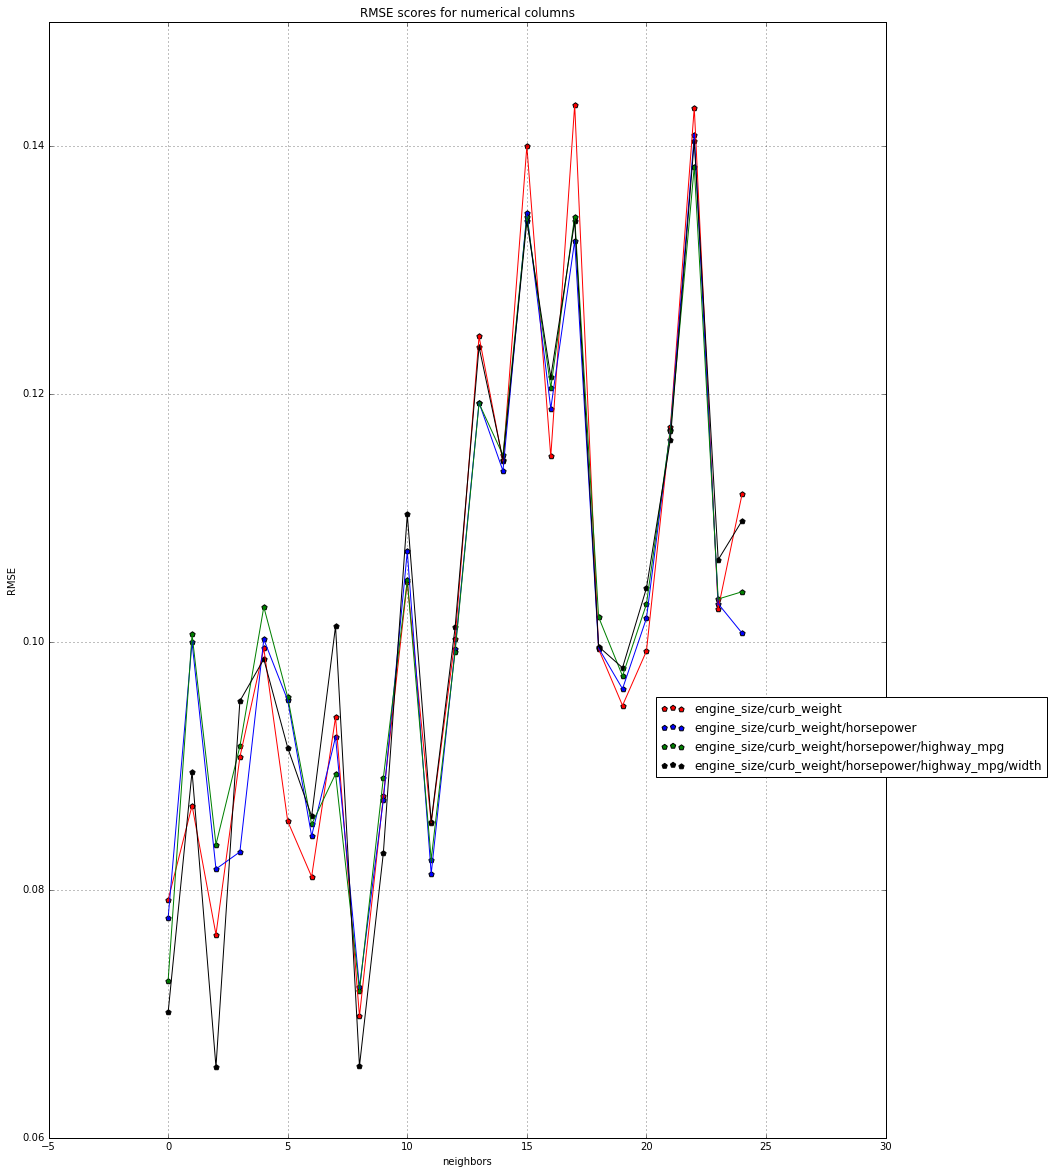

In [50]:
#knn with ability to choose k
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
def knn_train_test_multi_2(train_col, target_col, df, col,train_cols_string):
        
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    
    rmses = []
    
    for k in range(1,26):
        shuffled = np.random.permutation(df.index)
        random_df = df.reindex(shuffled)
        #take 50 percent as train and 50 percent as test data
        train_limit = round(len(random_df)/2)
        train_data = random_df.iloc[:train_limit,:]
        test_data = random_df.iloc[train_limit:,:]
        #k is default 5
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_data[train_col], train_data[target_col])    
        predictions = knn.predict(test_data[train_col])
        mse = mean_squared_error(predictions, test_data[target_col])
        rmse = np.sqrt(mse)
        rmses.append(rmse)
        
        
    
    ax1.scatter(np.arange(0,25),rmses, c=col, alpha=1, marker=(5, 0), s=30,linestyle='-',label=train_cols_string)
    ax1.plot(np.arange(0,25),rmses,c=col)
    return rmses


fig1, ax1 = plt.subplots(figsize=(15,20),sharey=True)




ax1.axes.get_yaxis().set_visible(True)
ax1.grid(True)
ax1.set_xlabel('neighbors')
ax1.set_ylabel('RMSE')
    
two_best = 'engine_size/curb_weight'
rmses_best_two = knn_train_test_multi_2(['engine_size','curb_weight'],'price',normalised_numeric,'red',two_best)


#plot2 using best three columns
three_best = 'engine_size/curb_weight/horsepower'
rmses_best_three = knn_train_test_multi_2(['engine_size','curb_weight', 'horsepower'],'price',normalised_numeric,'blue',three_best)


#plot3 using best four columns
four_best = 'engine_size/curb_weight/horsepower/highway_mpg'
rmses_best_four = knn_train_test_multi_2(['engine_size','curb_weight','horsepower','highway_mpg'],'price',normalised_numeric,'green',four_best)


five_best = 'engine_size/curb_weight/horsepower/highway_mpg/width'
rmses_best_five = knn_train_test_multi_2(['engine_size','curb_weight', 'horsepower', 'highway_mpg', 'width'],'price',normalised_numeric,'black',five_best)




ax1.axes.get_yaxis().set_visible(True)
ax1.grid(True)
ax1.set_xlabel('neighbors')
ax1.set_ylabel('RMSE')



plt.legend(bbox_to_anchor=(1.2,0.4))
plt.title('RMSE scores for numerical columns')
plt.show()

Choosing higher value K results in less accuracy in general. The best combination we could find was using the k value 2 or 8 and training on all 5 columns 